# Data Reprocessing 

Dataset link: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
dataset = pd.read_csv('insurance.csv')

In [4]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.select_dtypes(include=object).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
len(dataset.select_dtypes(include=object).columns)

3

In [9]:
dataset.select_dtypes(include=[int,float]).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
len(dataset.select_dtypes(include=[int,float]).columns)

4

In [12]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Group dataset by Sex, Smoker and Region

In [14]:
dataset.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [15]:
dataset.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [17]:
dataset.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


#### Dealing with missing dataset

In [20]:
dataset.isnull().values.any()

False

In [21]:
dataset.isnull().values.sum()

0

#### Encoding categorical Data

In [22]:
dataset.select_dtypes(include=object).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [24]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [25]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### one hot encoding 

In [31]:
dataset = pd.get_dummies(data=dataset, drop_first=True).astype(int)

In [32]:
dataset.head(4)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0


In [33]:
dataset.shape

(1338, 9)

#### Correlation Matrix

In [34]:
dataset_2 = dataset.drop(columns='charges')

In [36]:
dataset_2.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0


<Axes: title={'center': 'Correlation with charges'}>

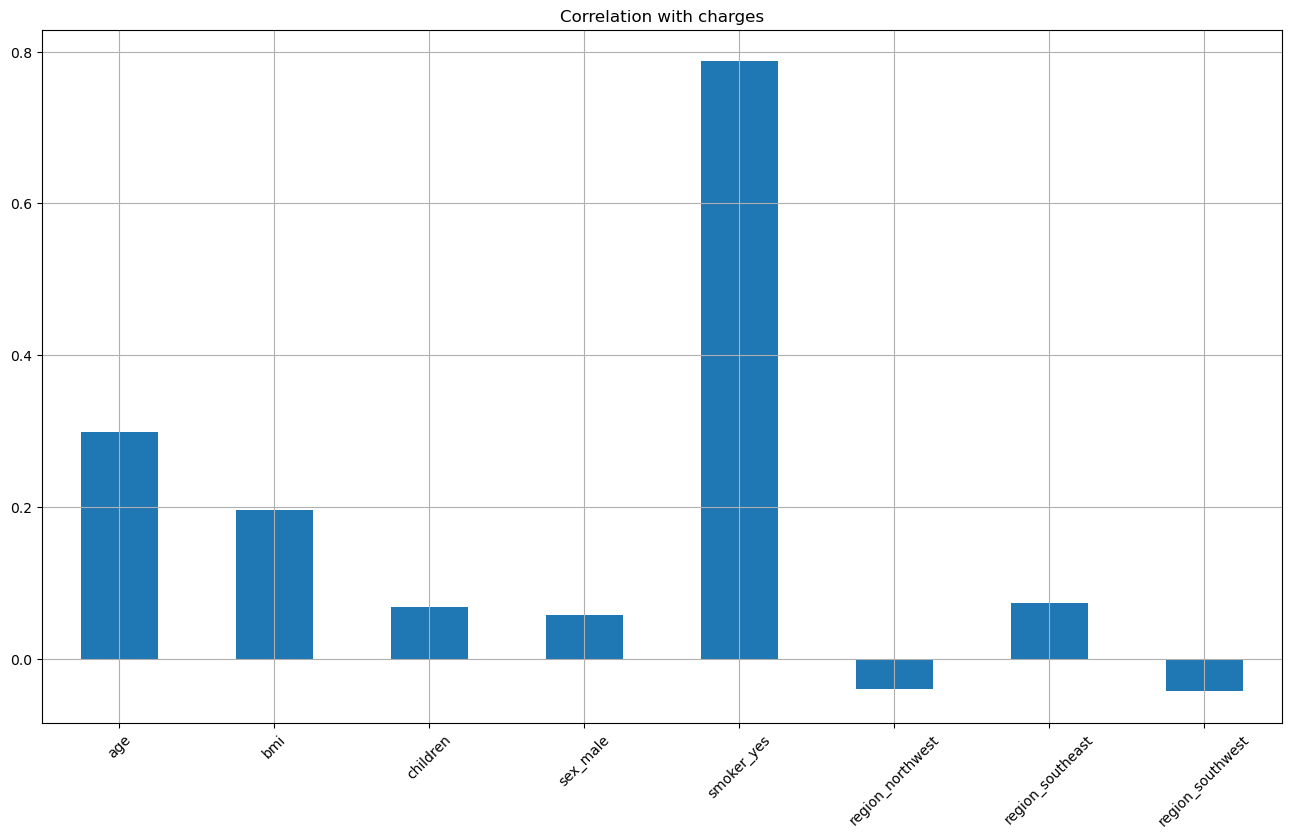

In [37]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize =(16,9), title='Correlation with charges', rot = 45, grid=True)

In [38]:
corr = dataset.corr()

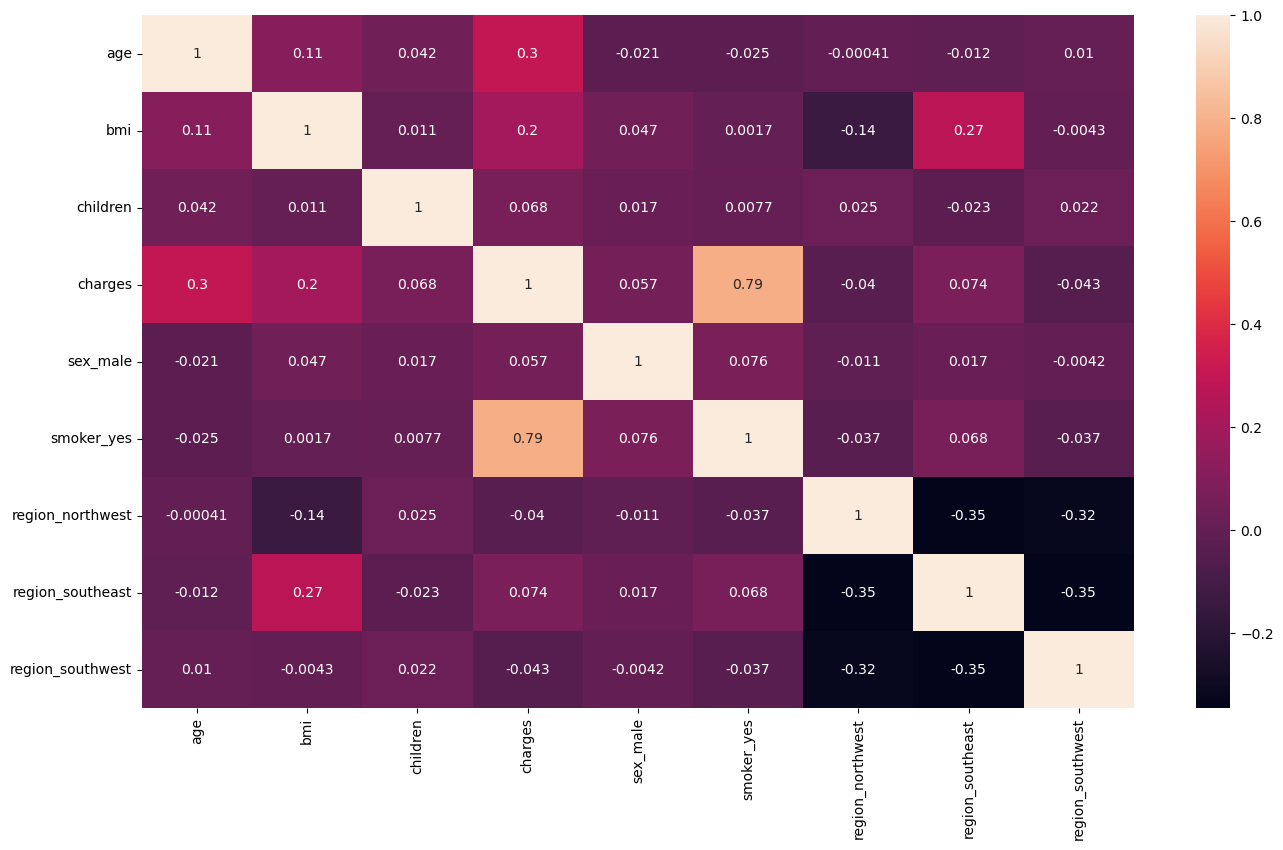

In [39]:
# Heatmap

plt.figure(figsize=(16,9))
sns.heatmap(data=corr, annot=True)
plt.show()

#### Feature scaling and splitting the dataset

In [43]:
x = dataset.drop(columns='charges')

In [69]:
y = dataset['charges']

In [64]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [71]:
x_train.shape

(1070, 8)

In [72]:
x_test.shape

(268, 8)

In [73]:
y_train.shape

(1070,)

In [74]:
y_test.shape

(268,)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [76]:
x_train

array([[-0.14853305,  0.60616004,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.60616004, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.92836135,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.84374587, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.7672607 , -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97145047, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [77]:
x_test

array([[ 0.91668389, -0.03824259, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.19934324, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.57276398,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.57276398, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.41166332,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -1.00484653,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

### Building the model

#### Multiple Linear Regression

#### Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr_mdl = LinearRegression()

In [80]:
lr_mdl.fit(x_train, y_train)

LinearRegression()

In [81]:
y_predict1 = lr_mdl.predict(x_test)

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y_predict1, y_test)

0.725234352879035

#### Random forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf_rgmdl = RandomForestRegressor()

In [86]:
rf_rgmdl.fit(x_train, y_train)

RandomForestRegressor()

In [87]:
y_predict2 = rf_rgmdl.predict(x_test)

In [88]:
r2_score(y_predict2, y_test)

0.8688136148305208

#### XGBoost Regression

In [89]:
from xgboost import XGBRFRegressor

In [90]:
xgbf = XGBRFRegressor()

In [92]:
xgbf.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [93]:
y_predict3 = xgbf.predict(x_test)

In [94]:
r2_score(y_predict3, y_test)

0.8891919667183703

### Predicting charges for a new customer

For frank a new customer Name: Frank, age: 40, sex: male, bmi:45.50, children:4, smoker:1, region:northeast

In [95]:
dataset.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0


In [96]:
frank_data = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [97]:
xgbf.predict(sc.transform(frank_data))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44485.844], dtype=float32)

The predicted charges for frank is 44,485.844

Customer 2 

Name: Sara, age:19, bmi:27.9, children:0, sex:female, smoker:no, region: northwest

prediciting charges for sara

In [98]:
sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [99]:
xgbf.predict(sc.transform(sara_obs))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2477.6143], dtype=float32)

Predicted charges for Sara 2477.6143